<center><font size=6> Bank Churn Prediction </font></center>

## Problem Statement

### Context

Businesses like banks which provide service have to worry about problem of 'Customer Churn' i.e. customers leaving and joining another service provider. It is important to understand which aspects of the service influence a customer's decision in this regard. Management can concentrate efforts on improvement of service, keeping in mind these priorities.

### Objective

You as a Data scientist with the  bank need to  build a neural network based classifier that can determine whether a customer will leave the bank  or not in the next 6 months.

### Data Dictionary

* CustomerId: Unique ID which is assigned to each customer

* Surname: Last name of the customer

* CreditScore: It defines the credit history of the customer.
  
* Geography: A customer’s location
   
* Gender: It defines the Gender of the customer
   
* Age: Age of the customer
    
* Tenure: Number of years for which the customer has been with the bank

* NumOfProducts: refers to the number of products that a customer has purchased through the bank.

* Balance: Account balance

* HasCrCard: It is a categorical variable which decides whether the customer has credit card or not.

* EstimatedSalary: Estimated salary

* isActiveMember: Is is a categorical variable which decides whether the customer is active member of the bank or not ( Active member in the sense, using bank products regularly, making transactions etc )

* Exited : whether or not the customer left the bank within six month. It can take two values
** 0=No ( Customer did not leave the bank )
** 1=Yes ( Customer left the bank )

## Importing necessary libraries

In [164]:
# Library for data manipulation and analysis.
import pandas as pd
# Fundamental package for scientific computing.
import numpy as np
#splitting datasets into training and testing sets.
from sklearn.model_selection import train_test_split
#Imports tools for data preprocessing including label encoding, one-hot encoding, and standard scaling
from sklearn.preprocessing import LabelEncoder, OneHotEncoder,StandardScaler
#Imports a class for imputing missing values in datasets.
from sklearn.impute import SimpleImputer
#Imports the Matplotlib library for creating visualizations.
import matplotlib.pyplot as plt
# Imports the Seaborn library for statistical data visualization.
import seaborn as sns
# Time related functions.
import time
#Imports functions for evaluating the performance of machine learning models
from sklearn.metrics import confusion_matrix, f1_score,accuracy_score, recall_score, precision_score, classification_report

#Imports the tensorflow,keras and layers.
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Dense, Input, Dropout,BatchNormalization
from tensorflow.keras import backend
# Importing optimizers
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.optimizers import SGD

# To oversample data
from imblearn.over_sampling import SMOTE
import random

# to suppress unnecessary warnings
import warnings
warnings.filterwarnings("ignore")

## Loading the dataset

In [92]:
 #Reading the dataset.
Data = pd.read_csv('Churn.csv')

## Data Overview

In [93]:
# Let's view the first 5 rows of the data
Data.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [94]:
# view the last 5 rows of the data
Data.tail()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1
9999,10000,15628319,Walker,792,France,Female,28,4,130142.79,1,1,0,38190.78,0


Some columns that are unique or meaningless to prediction that should likely drop include: RowNumber, CustomerId, and Surname. RowNumber is an artifact in the csv file. CustomerId is just a unique ID for data purposes. And Surname is customer-specific.

In [95]:
# Let's view the shape of the data
Data.shape

(10000, 14)

There are 10,000 rows and 14 columns in the dataset.

In [96]:
# Let's view the info of the data
Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [97]:
#Check the number of missing values in the dataset
Data.isnull().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

- There are no null values of any of the columns.
- Surname, Geography, and Gender are categorical object variables.
- HasCrCard, IsActiveMember, and Exited are numberical columns but in reality are categorical variables, so will need to be treated later.

In [98]:
#Check for duplicates in the dataset
Data.duplicated().sum()

0

No duplicated rows in dataset.

In [99]:
#Find the count of unique values in each column of the dataset
Data.nunique()

RowNumber          10000
CustomerId         10000
Surname             2932
CreditScore          460
Geography              3
Gender                 2
Age                   70
Tenure                11
Balance             6382
NumOfProducts          4
HasCrCard              2
IsActiveMember         2
EstimatedSalary     9999
Exited                 2
dtype: int64

- As expected the RowNumber and CustomerId are unique and should be dropped.
- Binary categorical variables (HasCrCard, IsActiveMember, and the dependent variable Exited) where only 2 values would be expected are such in the dataset. Gender only has 2 values in the dataset as well.

In [100]:
#Check the distribution of the target variable 'Exited' in Data - show as percentage
Data['Exited'].value_counts(normalize=True) * 100

0    79.63
1    20.37
Name: Exited, dtype: float64

Only 20% of the dataset represents customers who have exited the bank as customers. Weight adjustment in the model will need to tried.

In [101]:
#Drop in place the unique and irrelevant columns from the dataset - 'RowNumber', 'CustomerId' and 'Surname'
Data.drop(['RowNumber', 'CustomerId', 'Surname'], axis=1, inplace=True)
#Check the shape of the data after dropping the columns
Data.shape

(10000, 11)

In [102]:
#Check the first 5 rows of the data after dropping the columns
Data.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


## Exploratory Data Analysis

### Helper Functions for Data Analysis

In [103]:
# function to plot a boxplot and a histogram along the same scale.
def histogram_boxplot(data, feature, figsize=(12, 7), kde=False, bins=None):
    """
    Boxplot and histogram combined

    data: dataframe
    feature: dataframe column
    figsize: size of figure (default (12,7))
    kde: whether to show the density curve (default False)
    bins: number of bins for histogram (default None)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid= 2
        sharex=True,  # x-axis will be shared among all subplots
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )  # creating the 2 subplots
    sns.boxplot(
        data=data, x=feature, ax=ax_box2, showmeans=True, color="violet"
    )  # boxplot will be created and a star will indicate the mean value of the column
    sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2, bins=bins, palette="winter"
    ) if bins else sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2
    )  # For histogram
    ax_hist2.axvline(
        data[feature].mean(), color="green", linestyle="--"
    )  # Add mean to the histogram
    ax_hist2.axvline(
        data[feature].median(), color="black", linestyle="-"
    )  # Add median to the histogram

In [104]:
# function to create labeled barplots
def labeled_barplot(data, feature, perc=False, n=None):
    """
    Barplot with percentage at the top

    data: dataframe
    feature: dataframe column
    perc: whether to display percentages instead of count (default is False)
    n: displays the top n category levels (default is None, i.e., display all levels)
    """

    total = len(data[feature])  # length of the column
    count = data[feature].nunique()
    if n is None:
        plt.figure(figsize=(count + 1, 5))
    else:
        plt.figure(figsize=(n + 1, 5))

    plt.xticks(rotation=90, fontsize=15)
    ax = sns.countplot(
        data=data,
        x=feature,
        palette="Paired",
        order=data[feature].value_counts().index[:n].sort_values(),
    )

    for p in ax.patches:
        if perc == True:
            label = "{:.1f}%".format(
                100 * p.get_height() / total
            )  # percentage of each class of the category
        else:
            label = p.get_height()  # count of each level of the category

        x = p.get_x() + p.get_width() / 2  # width of the plot
        y = p.get_height()  # height of the plot

        ax.annotate(
            label,
            (x, y),
            ha="center",
            va="center",
            size=12,
            xytext=(0, 5),
            textcoords="offset points",
        )  # annotate the percentage

    plt.show()  # show the plot

In [105]:
# function to plot stacked bar chart
def stacked_barplot(data, predictor, target):
    """
    Print the category counts and plot a stacked bar chart

    data: dataframe
    predictor: independent variable
    target: target variable
    """
    count = data[predictor].nunique()
    sorter = data[target].value_counts().index[-1]
    tab1 = pd.crosstab(data[predictor], data[target], margins=True).sort_values(
        by=sorter, ascending=False
    )
    print(tab1)
    print("-" * 120)
    tab = pd.crosstab(data[predictor], data[target], normalize="index").sort_values(
        by=sorter, ascending=False
    )
    tab.plot(kind="bar", stacked=True, figsize=(count + 1, 5))
    plt.legend(
        loc="lower left",
        frameon=False,
    )
    plt.legend(loc="upper left", bbox_to_anchor=(1, 1))
    plt.show()

### Univariate Analysis

#### CreditScore

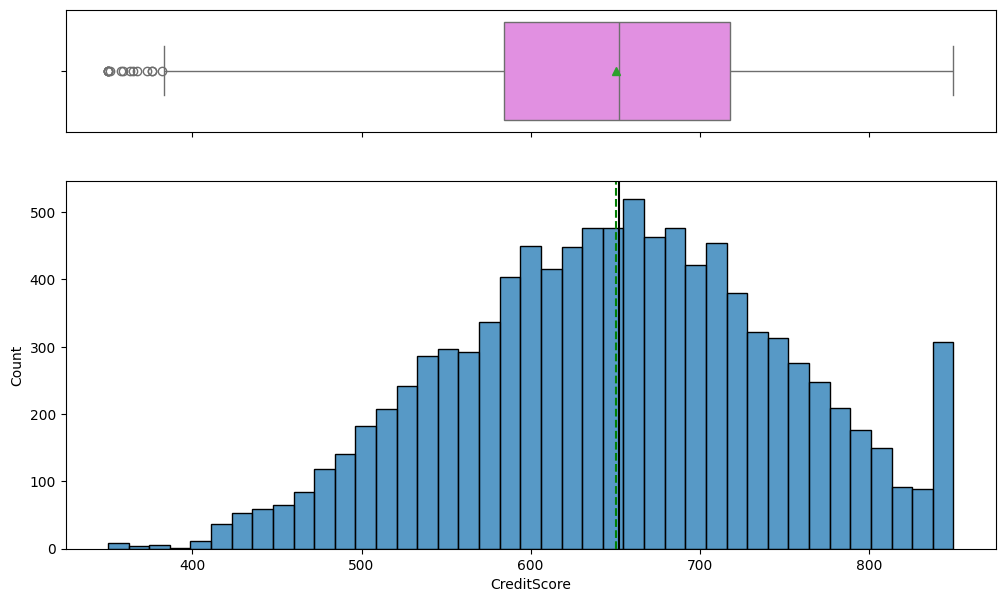

In [106]:
#create a histogram and boxplot for 'CreditScore'
histogram_boxplot(Data, 'CreditScore')

- Credit score has a relatively normal distribution with a slight left skew.
- The highest score (~850) has a relatively high count. Perhaps this is just a large number of people that were assigned perfect scores.
- Some outliers exist at the low level, but they seem legit scores of 300 or above, so no reason to treat or exclude.

#### Age

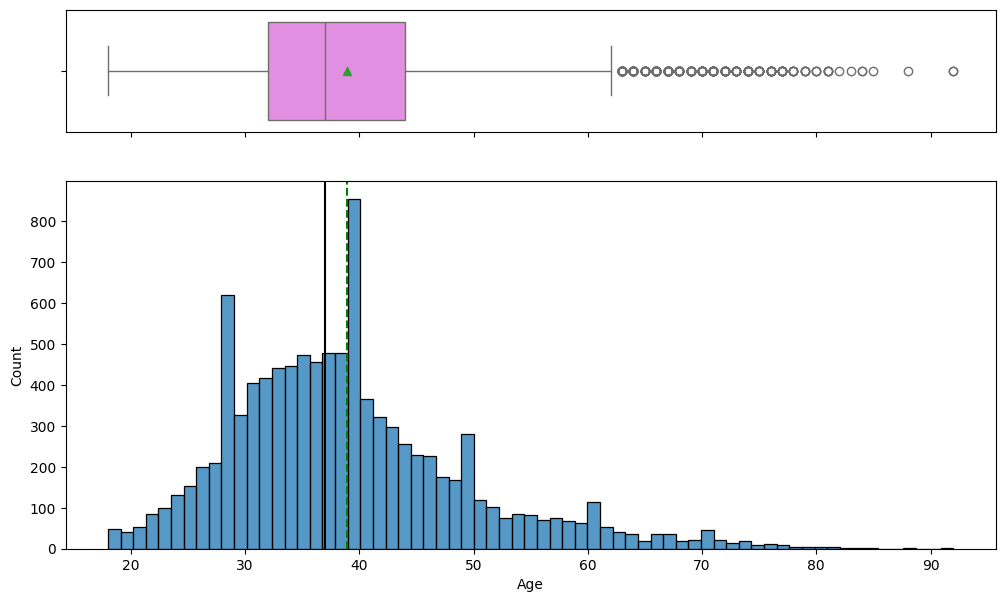

In [107]:
histogram_boxplot(Data, 'Age')

- Age is right-skewed.
- Approximately 50% of customers are in the 30s to mid-40s range.
- Outliers exist at the high end in the 80s and 90s, but these are reasonable ages, so no reason to exclude.

#### Tenure

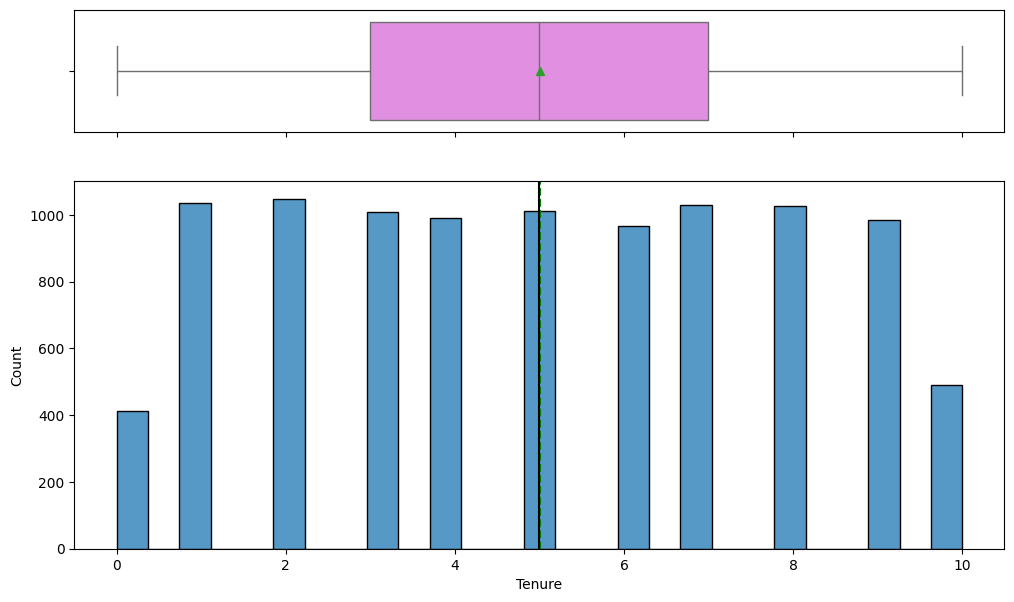

In [108]:
histogram_boxplot(Data, 'Tenure')

- Bank customer tenure is a continuous numerical variable. However, it could also be regarded as a categorical variable as all values range between 0 and 10 years as integers.
- Tenure is fairly evenly spread between 1 and 9 years. With fewer under 1 year or at 10 years.

#### Balance

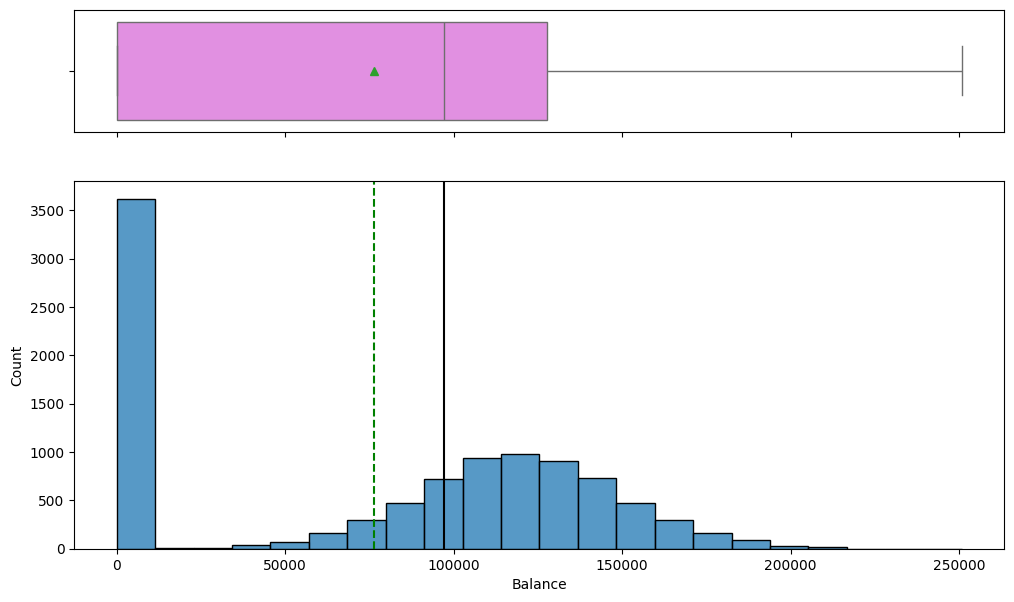

In [109]:
histogram_boxplot(Data, 'Balance')

- By far the largest number of customers have a balance below ~1,000 Euros (assuming that is the denomination).
- Otherwise the distribution is rather normal, with a secondary mode around ~12,000 Euros.

#### NumOfProducts

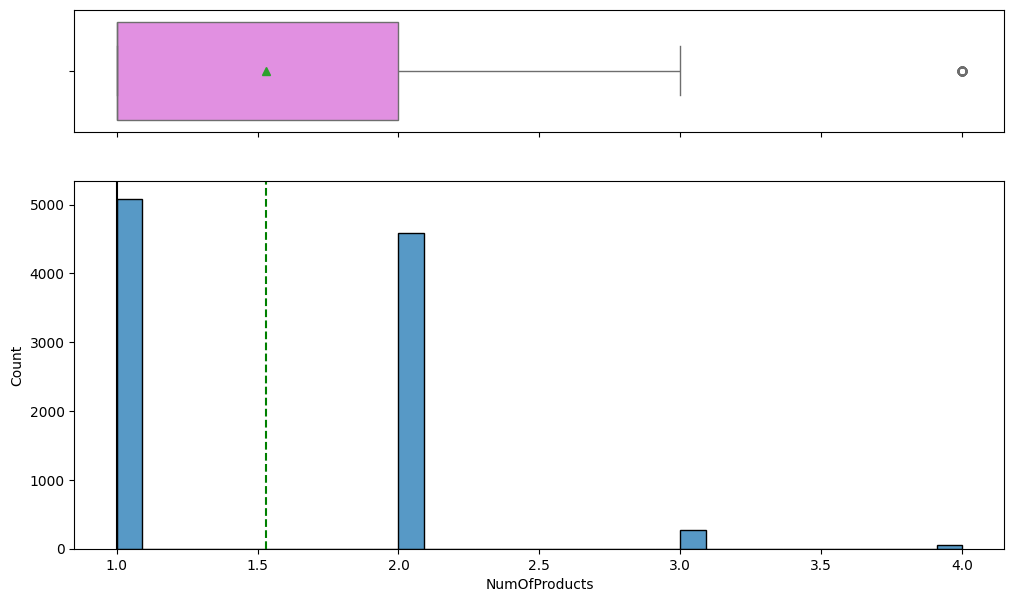

In [110]:
histogram_boxplot(Data, 'NumOfProducts')

- Number of products is an integer variable. However, it could also be regarded as a categorical variable as the values are 1, 2, 3, and 4.
- The count of products per customer decreases from 1 to 4 products.

#### EstimatedSalary

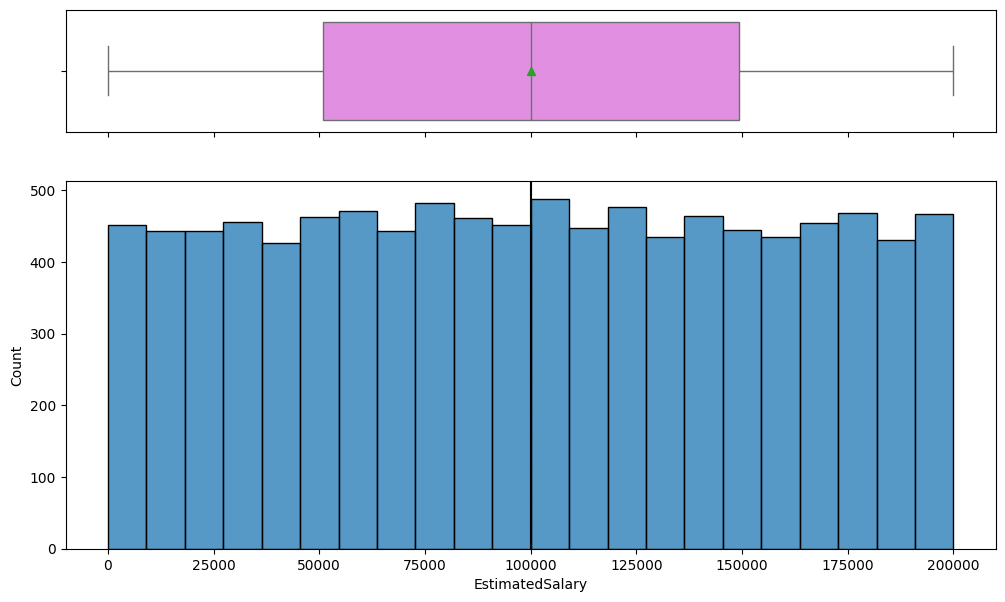

In [111]:
histogram_boxplot(Data, 'EstimatedSalary')

- Estimated salary is very evenly distributed from 0 to 200,000 Euros.
- The median salary is ~100,000 Euros. No outliers are present.

#### Geography

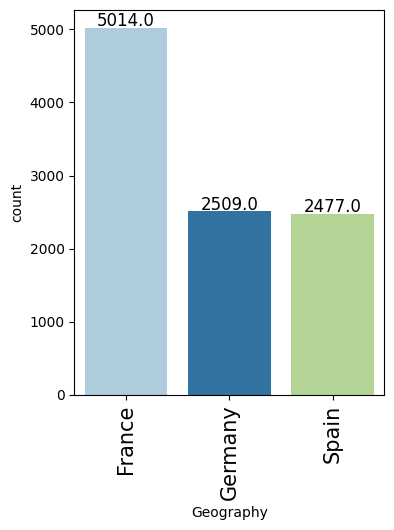

In [112]:
labeled_barplot(Data, 'Geography')

- There are 3 geographies (i.e. countries) present: France, Germany, Spain.
- France has approximately as many customers as Germany and Spain combined.

#### Gender

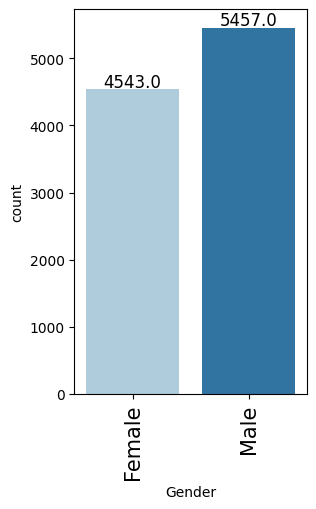

In [113]:
labeled_barplot(Data, 'Gender')

Males represent ~55% with females representing the other 45%. No other gender identities are classified in the dataset.

#### HasCrCard

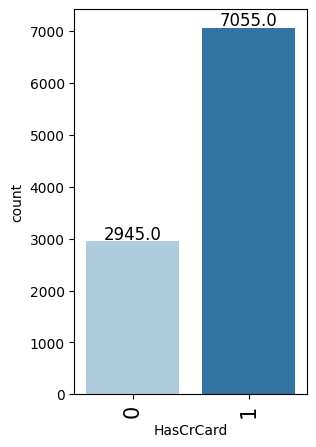

In [114]:
labeled_barplot(Data, 'HasCrCard')

71% of customers have a credit card with the bank. The rest do not.

#### IsActiveMember

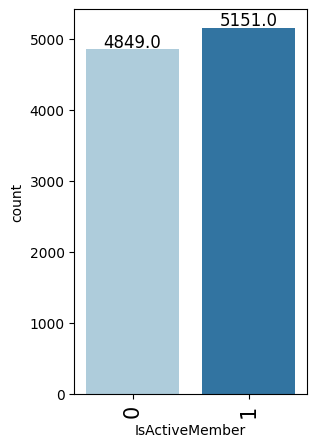

In [115]:
labeled_barplot(Data, 'IsActiveMember')

There is a fairly even split of active and inactive customers interacting with the bank. 52% are considered active.

#### Exited

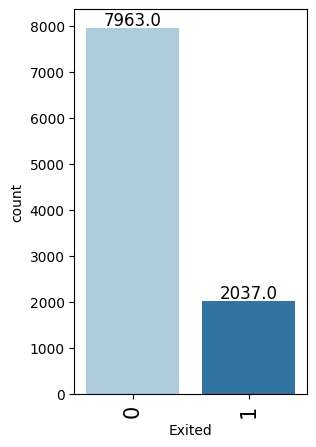

In [116]:
labeled_barplot(Data, 'Exited')

Only 20% of customers have exited the bank. These class weights need to be considered in the model.

### Bivariate Analysis

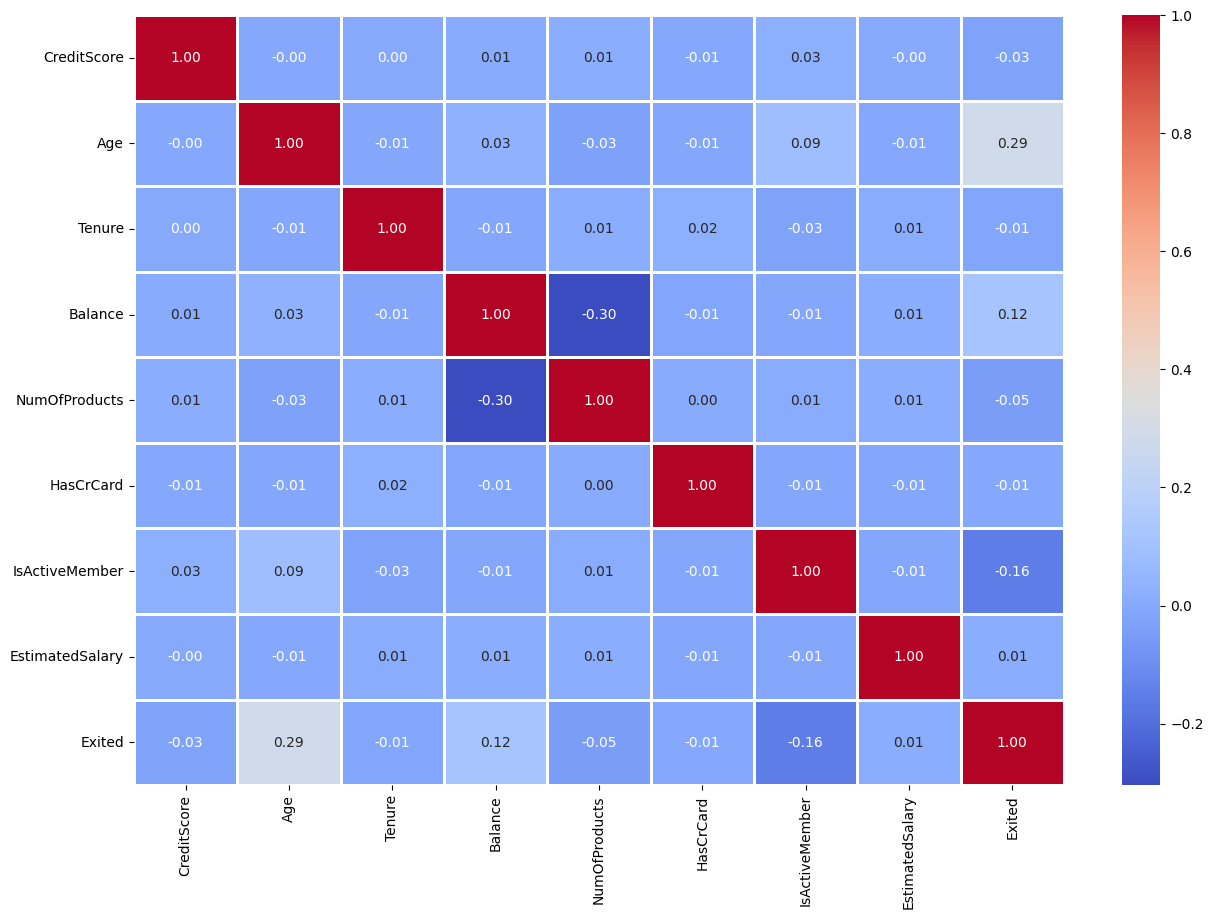

In [117]:
#create a heatmap of the correlation matrix of the dataset
plt.figure(figsize=(15, 10))
sns.heatmap(Data.corr(), annot=True, cmap='coolwarm', fmt='.2f', linewidths=2)
plt.show()

- There is not a high correlation amongst any of the variables.
- Age and Exited show the highest positive correlation, but only .29.
- Num of Products and Balance show the most negative correlation, but again only .3.

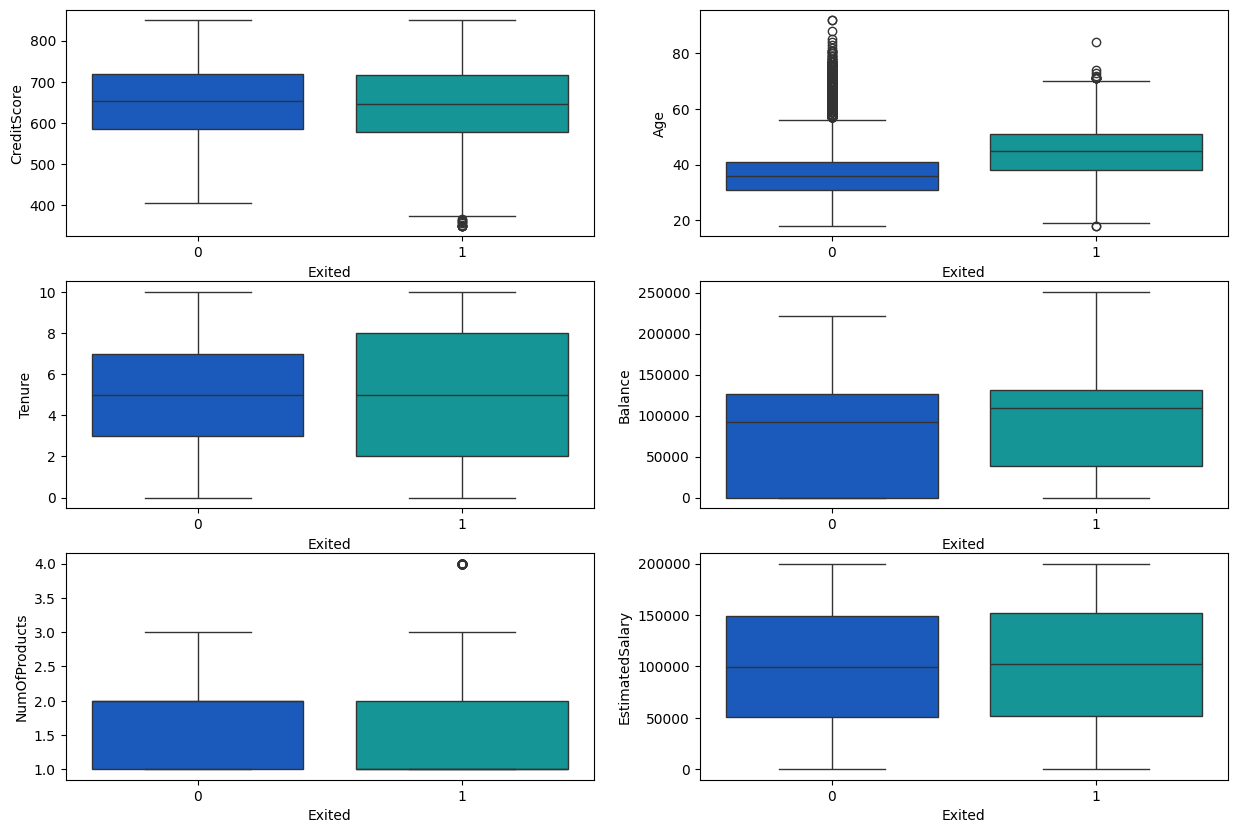

In [118]:
#Create plots showing each feature against the target variable 'Exited'
plt.figure(figsize=(15, 10))
plt.subplot(3, 2, 1)
sns.boxplot(x='Exited', y='CreditScore', data=Data, palette='winter')
plt.subplot(3, 2, 2)
sns.boxplot(x='Exited', y='Age', data=Data, palette='winter')
plt.subplot(3, 2, 3)
sns.boxplot(x='Exited', y='Tenure', data=Data, palette='winter')
plt.subplot(3, 2, 4)
sns.boxplot(x='Exited', y='Balance', data=Data, palette='winter')
plt.subplot(3, 2, 5)
sns.boxplot(x='Exited', y='NumOfProducts', data=Data, palette='winter')
plt.subplot(3, 2, 6)
sns.boxplot(x='Exited', y='EstimatedSalary', data=Data, palette='winter')
plt.show()

- Credit scores are similar for exited and existing customers- with approximately 50% of each having scores around 600-700.
- The Age of exited customers is a larger variance and tends to be older. However, non-existed customers have more outliers older than 80.
- Tenure of exited customers has a wider central range between 25% and 75% of each categories' customers. The min and max are the same however.
- Balance of exited customers has a higher median, higher maximum, and fewer customers with balances under 50,000.
- Number of products between exited and existing customers is similar.
- Estimated salary between exited and existing customers is similar.
- Overall, Age and Balance seem like the numerical variables with the most differentiation between classes, and thus might best contribute to model predictions.

Exited        0     1    All
Geography                   
All        7963  2037  10000
Germany    1695   814   2509
France     4204   810   5014
Spain      2064   413   2477
------------------------------------------------------------------------------------------------------------------------


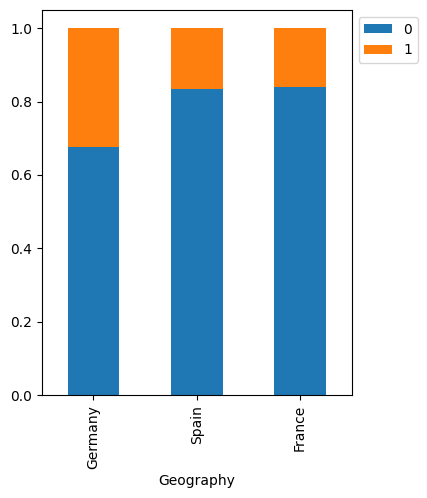

Exited     0     1    All
Gender                   
All     7963  2037  10000
Female  3404  1139   4543
Male    4559   898   5457
------------------------------------------------------------------------------------------------------------------------


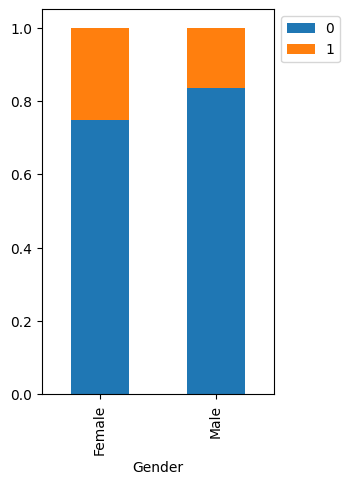

Exited        0     1    All
HasCrCard                   
All        7963  2037  10000
1          5631  1424   7055
0          2332   613   2945
------------------------------------------------------------------------------------------------------------------------


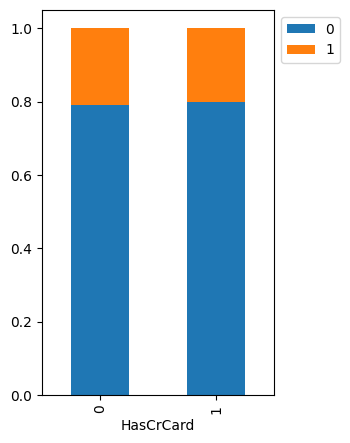

Exited             0     1    All
IsActiveMember                   
All             7963  2037  10000
0               3547  1302   4849
1               4416   735   5151
------------------------------------------------------------------------------------------------------------------------


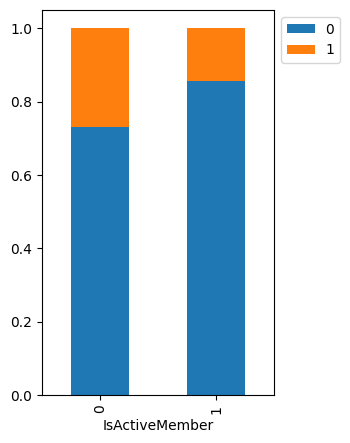

In [119]:
#Use the stacked_barplot function to plot a stacked bar chart showing the distribution of the target variable 'Exited' across the categorical features
stacked_barplot(Data, 'Geography', 'Exited')
stacked_barplot(Data, 'Gender', 'Exited')
stacked_barplot(Data, 'HasCrCard', 'Exited')
stacked_barplot(Data, 'IsActiveMember', 'Exited')

- The proportion of customers in Germany who have exited the bank is higher than the other 2 countries.
- Females are more likely than males to have exited.
- Credit card possession with the bank does not show a significant difference in exiting the bank.
- Active members are less likely to have exited as a customer of the bank.
- Overall, geography, gender, and activity seem to exhibit differences in exiting customers between their classes. These might be fruitful features for modeling.

## Data Preprocessing

### Train-validation-test Split

In [120]:
X = Data.drop('Exited', axis=1)
y = Data['Exited']

# Split the data into train and temporary sets
X_train, X_temp, y_train, y_temp = train_test_split(X, y, train_size=0.7, random_state=42)

# Split the temporary set into validation and test sets
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

In [121]:
#Print the shape of each y set
print(y_train.shape)
print(y_val.shape)
print(y_test.shape)

(7000,)
(1500,)
(1500,)


In [122]:
y_train.head()

9069    1
2603    0
7738    0
1579    0
5058    0
Name: Exited, dtype: int64

### Dummy Variable Creation

In [123]:
#Create dummy variables for the categorical features (Geography and Gender) in the training, validation, and test sets
X_train = pd.get_dummies(X_train, drop_first=True)
X_val = pd.get_dummies(X_val, drop_first=True)
X_test = pd.get_dummies(X_test, drop_first=True)

#Check the shape of the training set
print(X_train.shape)
#Check the shape of the validation set
print(X_val.shape)
#Check the shape of the test set
print(X_test.shape)

(7000, 11)
(1500, 11)
(1500, 11)


In [124]:
X_train.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_Germany,Geography_Spain,Gender_Male
9069,619,32,4,175406.13,2,1,1,172792.43,0,1,0
2603,643,34,7,160426.07,1,0,1,188533.11,1,0,0
7738,561,33,6,0.00,2,0,0,173680.39,0,0,1
1579,618,41,8,37702.79,1,1,1,195775.48,1,0,1
5058,714,37,9,148466.93,2,0,1,151280.96,0,0,1


The independent and target data sets are split 70% into training, 15% into validation, and 15% into testing data. This is done prior to other processing to avoid data leakage on the validation and test datasets.

### Data Normalization

In [125]:
#Create a list of numerical columns in the dataset
num_cols = ['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'EstimatedSalary']

#Normalize the training, validation, and test sets using StandardScaler
scaler = StandardScaler()
X_train[num_cols] = scaler.fit_transform(X_train[num_cols])
X_val[num_cols] = scaler.transform(X_val[num_cols])
X_test[num_cols] = scaler.transform(X_test[num_cols])

X_train.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_Germany,Geography_Spain,Gender_Male
9069,-0.344595,-0.656750,-0.342170,1.583725,0.819663,1,1,1.248214,0,1,0
2603,-0.095181,-0.466380,0.698162,1.344106,-0.903352,0,1,1.521225,1,0,0
7738,-0.947345,-0.561565,0.351385,-1.222055,0.819663,0,0,1.263615,0,0,1
1579,-0.354987,0.199916,1.044940,-0.618965,-0.903352,1,1,1.646839,1,0,1
5058,0.642668,-0.180824,1.391718,1.152808,0.819663,0,1,0.875112,0,0,1


## Model Building

### Model Evaluation Criterion

Write down the logic for choosing the metric that would be the best metric for this business scenario.

#### The binary model can make wrong predictions as:
* Predicting a customer will exit the bank and they do not. (False Positive)
* Predicting a customer will not exit the bank and they do. (False Negative)

#### Which case is more important? 
* False Negative- predicting a customer will not exit the bank and they do. This means the bank will unexpectedly lose a customer, and thus did not get a chance to reinforce their relationship with the bank prior to them leaving. This results in lost business for the bank.
* The alternative of false positives is not as important as it likely means some cost was absorbed of retaining a customer who wasn't going to leave. But this is likely not as damaging as the false negative scenario.

#### How to reduce this loss i.e need to reduce False Negative?
* The bank needs a model where `Recall` is maximized as a higher recall score reduces False Negatives.

### Helper functions for models and evaluation

In [126]:
def make_confusion_matrix(cf,
                          group_names=None,
                          categories='auto',
                          count=True,
                          percent=True,
                          cbar=True,
                          xyticks=True,
                          xyplotlabels=True,
                          sum_stats=True,
                          figsize=None,
                          cmap='Blues',
                          title=None):
    '''
    This function will make a pretty plot of an sklearn Confusion Matrix cm using a Seaborn heatmap visualization.
    Arguments
    '''


    # CODE TO GENERATE TEXT INSIDE EACH SQUARE
    blanks = ['' for i in range(cf.size)]

    if group_names and len(group_names)==cf.size:
        group_labels = ["{}\n".format(value) for value in group_names]
    else:
        group_labels = blanks

    if count:
        group_counts = ["{0:0.0f}\n".format(value) for value in cf.flatten()]
    else:
        group_counts = blanks

    if percent:
        group_percentages = ["{0:.2%}".format(value) for value in cf.flatten()/np.sum(cf)]
    else:
        group_percentages = blanks

    box_labels = [f"{v1}{v2}{v3}".strip() for v1, v2, v3 in zip(group_labels,group_counts,group_percentages)]
    box_labels = np.asarray(box_labels).reshape(cf.shape[0],cf.shape[1])


    # CODE TO GENERATE SUMMARY STATISTICS & TEXT FOR SUMMARY STATS
    if sum_stats:
        #Accuracy is sum of diagonal divided by total observations
        accuracy  = np.trace(cf) / float(np.sum(cf))

        #if it is a binary confusion matrix, show some more stats
        if len(cf)==2:
            #Metrics for Binary Confusion Matrices
            precision = cf[1,1] / sum(cf[:,1])
            recall    = cf[1,1] / sum(cf[1,:])
            f1_score  = 2*precision*recall / (precision + recall)
            stats_text = "\n\nAccuracy={:0.3f}\nPrecision={:0.3f}\nRecall={:0.3f}\nF1 Score={:0.3f}".format(
                accuracy,precision,recall,f1_score)
        else:
            stats_text = "\n\nAccuracy={:0.3f}".format(accuracy)
    else:
        stats_text = ""


    # SET FIGURE PARAMETERS ACCORDING TO OTHER ARGUMENTS
    if figsize==None:
        #Get default figure size if not set
        figsize = plt.rcParams.get('figure.figsize')

    if xyticks==False:
        #Do not show categories if xyticks is False
        categories=False


    # MAKE THE HEATMAP VISUALIZATION
    plt.figure(figsize=figsize)
    sns.heatmap(cf,annot=box_labels,fmt="",cmap=cmap,cbar=cbar,xticklabels=categories,yticklabels=categories)

    if xyplotlabels:
        plt.ylabel('True label')
        plt.xlabel('Predicted label' + stats_text)
    else:
        plt.xlabel(stats_text)
    
    if title:
        plt.title(title)

In [127]:
def plot(history, name):
    """
    Function to plot loss/accuracy

    history: an object which stores the metrics and losses.
    name: can be one of Loss or Accuracy
    """
    fig, ax = plt.subplots() #Creating a subplot with figure and axes.
    plt.plot(history.history[name]) #Plotting the train accuracy or train loss
    plt.plot(history.history['val_'+name]) #Plotting the validation accuracy or validation loss

    plt.title('Model ' + name.capitalize()) #Defining the title of the plot.
    plt.ylabel(name.capitalize()) #Capitalizing the first letter.
    plt.xlabel('Epoch') #Defining the label for the x-axis.
    fig.legend(['Train', 'Validation'], loc="outside right upper") #Defining the legend, loc controls the position of the legend.

Dataframe to handle results of models:

In [128]:
#Defining the columns of the dataframe which are nothing but the hyper parameters and the metrics.
columns = ["# hidden layers","# neurons - hidden layer","activation function - hidden layer ","# epochs","batch size","optimizer","learning rate, momentum","weight initializer","regularization","train loss","validation loss","train accuracy","validation accuracy","time (secs)"]

#Creating a pandas dataframe.
results = pd.DataFrame(columns=columns)

#### Standard Model Parameters

In [129]:
#Use same batch size and epochs for models, unless noted below. This is to accurately compare other tuning methods.
batch_size = 32
epochs = 50
#Setting standard #s of neurons for first hidden layer and subsequent hidden layers.
firstHiddenLayerNeurons = 64
secondaryHiddenLayerNeurons = 32
#Default activation function for hidden layers is relu, which is widely used.
activationFunction = 'relu'
#Set default weight initializer to he_uniform, which is optimized for relu activation functions.
weightInitializer = 'he_uniform'
#Establishing the input shape for the model.
trainingDataShape = X_train.shape[1]
#Fixing the seed for random number generators so that we can ensure we receive the same output everytime
np.random.seed(42)
random.seed(42)
tf.random.set_seed(42)

### Neural Network with SGD Optimizer

In [130]:
# Clear the current Keras session, resetting all layers and models previously created, freeing up memory and resources.
tf.keras.backend.clear_session()

#Initialize a neural network using the Sequential class
model = Sequential()
#Add the first hidden layer with neurons and relu activation function
model.add(Dense(firstHiddenLayerNeurons, activation=activationFunction, kernel_initializer=weightInitializer, input_shape=(trainingDataShape,)))
#Add a second hidden layer with neurons and relu activation function
model.add(Dense(secondaryHiddenLayerNeurons, activation=activationFunction))
#Add the output layer with 1 neuron and sigmoid activation function
model.add(Dense(1, activation='sigmoid'))

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 64)                768       
                                                                 
 dense_1 (Dense)             (None, 32)                2080      
                                                                 
 dense_2 (Dense)             (None, 1)                 33        
                                                                 
Total params: 2881 (11.25 KB)
Trainable params: 2881 (11.25 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [138]:
#Compile the model with chosen optimizer and recall as the evaluation metric to minimize false negatives.
optimizer = tf.keras.optimizers.SGD() #Stochastic Gradient Descent
model.compile(loss='binary_crossentropy', optimizer=optimizer, metrics=[tf.keras.metrics.Recall()], run_eagerly=True)

In [132]:
#Fit the model on the training data and validate on the validation data
start = time.time()
history = model.fit(X_train, y_train, validation_data=(X_val,y_val), batch_size=batch_size, epochs=epochs)
end = time.time()

Epoch 1/50
219/219 [==============================] - 2s 8ms/step - loss: 0.5302 - recall: 0.0537 - val_loss: 0.4617 - val_recall: 0.0141
Epoch 2/50
219/219 [==============================] - 2s 8ms/step - loss: 0.4621 - recall: 0.0509 - val_loss: 0.4361 - val_recall: 0.0951
Epoch 3/50
111/219 [==============>...............] - ETA: 0s - loss: 0.4494 - recall: 0.1423

219/219 [==============================] - 2s 8ms/step - loss: 0.4437 - recall: 0.1370 - val_loss: 0.4209 - val_recall: 0.1127
Epoch 4/50
219/219 [==============================] - 2s 7ms/step - loss: 0.4323 - recall: 0.1769 - val_loss: 0.4129 - val_recall: 0.1901
Epoch 5/50
219/219 [==============================] - 2s 8ms/step - loss: 0.4230 - recall: 0.2120 - val_loss: 0.4044 - val_recall: 0.2218
Epoch 6/50
219/219 [==============================] - 2s 7ms/step - loss: 0.4150 - recall: 0.2374 - val_loss: 0.3976 - val_recall: 0.2570
Epoch 7/50
219/219 [==============================] - 2s 7ms/step - loss: 0.4080 - recall: 0.2629 - val_loss: 0.3902 - val_recall: 0.2676
Epoch 8/50
219/219 [==============================] - 2s 7ms/step - loss: 0.4020 - recall: 0.2897 - val_loss: 0.3847 - val_recall: 0.2923
Epoch 9/50
219/219 [==============================] - 2s 7ms/step - loss: 0.3967 - recall: 0.3111 - val_loss: 0.3785 - val_recall: 0.2887
Epoch 10/50
219/219 [========================

**Loss**

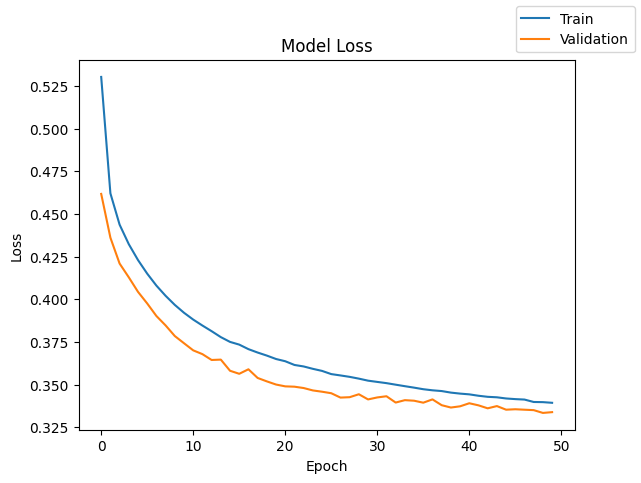

In [133]:
plot(history, 'loss')

The loss is actually less with the validation than training set which could indicate underfitting. They have not converged after 50 epochs.

**Confusion Matrix**

47/47 [==============================] - 0s 832us/step


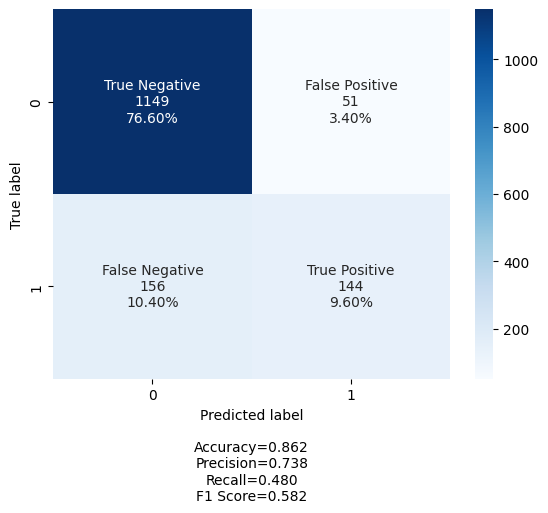

In [136]:
y_pred_test = model.predict(X_test)
for i in range(len(y_test)):
    if y_pred_test[i] > 0.5:
        y_pred_test[i] = 1
    else:
        y_pred_test[i] = 0

cm = confusion_matrix(y_test, y_pred_test)
labels = ['True Negative','False Positive','False Negative','True Positive']
make_confusion_matrix(cm, 
                      group_names=labels,
                      #categories=categories, 
                      cmap='Blues')

The recall score is .48 which is worse than 50/50 chance. False Negatives are 10% which is too high.

**Classification Report**

In [135]:
cr = classification_report(y_test, y_pred_test)
print(cr)

              precision    recall  f1-score   support

           0       0.88      0.96      0.92      1200
           1       0.74      0.48      0.58       300

    accuracy                           0.86      1500
   macro avg       0.81      0.72      0.75      1500
weighted avg       0.85      0.86      0.85      1500



Recall score is below 50% for predicted values.

## Model Performance Improvement

### Neural Network with Adam Optimizer

In [145]:
# Clear the current Keras session, resetting all layers and models previously created, freeing up memory and resources.
tf.keras.backend.clear_session()

#Initialize a neural network using the Sequential class
model = Sequential()
#Add the first hidden layer with neurons and relu activation function
model.add(Dense(firstHiddenLayerNeurons, activation=activationFunction, kernel_initializer=weightInitializer, input_shape=(trainingDataShape,)))
#Add a second hidden layer with neurons and relu activation function
model.add(Dense(secondaryHiddenLayerNeurons, activation=activationFunction))
#Add the output layer with 1 neuron and sigmoid activation function
model.add(Dense(1, activation='sigmoid'))

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 64)                768       
                                                                 
 dense_1 (Dense)             (None, 32)                2080      
                                                                 
 dense_2 (Dense)             (None, 1)                 33        
                                                                 
Total params: 2881 (11.25 KB)
Trainable params: 2881 (11.25 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [147]:
#Compile the model with chosen optimizer and recall as the evaluation metric to minimize false negatives.
optimizer = tf.keras.optimizers.Adam(learning_rate=1e-4) #Adam optimizer
model.compile(loss='binary_crossentropy', optimizer=optimizer, metrics=[tf.keras.metrics.Recall()], run_eagerly=True)

In [148]:
#Fit the model on the training data and validate on the validation data
start = time.time()
history = model.fit(X_train, y_train, validation_data=(X_val,y_val), batch_size=batch_size, epochs=epochs)
end = time.time()

Epoch 1/50
  7/219 [..............................] - ETA: 2s - loss: 0.7725 - recall_1: 0.5435

219/219 [==============================] - 2s 10ms/step - loss: 0.5880 - recall_1: 0.1163 - val_loss: 0.4982 - val_recall_1: 0.0176
Epoch 2/50
219/219 [==============================] - 2s 9ms/step - loss: 0.4933 - recall_1: 0.0186 - val_loss: 0.4601 - val_recall_1: 0.0599
Epoch 3/50
219/219 [==============================] - 2s 9ms/step - loss: 0.4645 - recall_1: 0.0812 - val_loss: 0.4392 - val_recall_1: 0.1056
Epoch 4/50
219/219 [==============================] - 2s 10ms/step - loss: 0.4469 - recall_1: 0.1273 - val_loss: 0.4272 - val_recall_1: 0.1725
Epoch 5/50
219/219 [==============================] - 2s 10ms/step - loss: 0.4337 - recall_1: 0.1755 - val_loss: 0.4165 - val_recall_1: 0.1901
Epoch 6/50
219/219 [==============================] - 2s 10ms/step - loss: 0.4232 - recall_1: 0.2120 - val_loss: 0.4093 - val_recall_1: 0.2394
Epoch 7/50
219/219 [==============================] - 2s 10ms/step - loss: 0.4148 - recall_1: 0.2443 - val_loss: 0.4014 - val_recall_1: 0.2535
Epoch 8/50
2

**Loss**

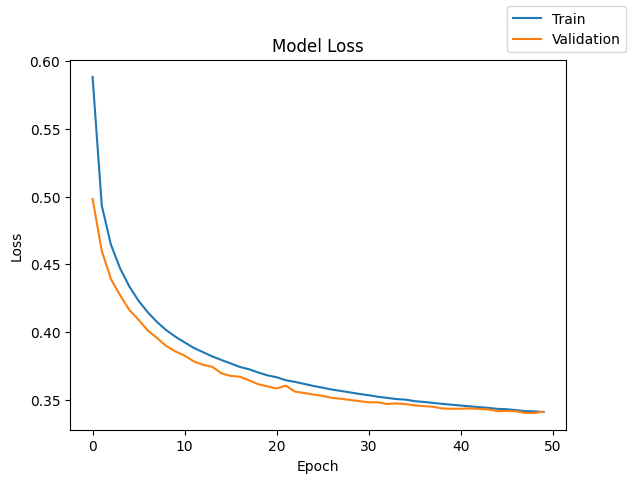

In [149]:
plot(history, 'loss')

The loss is actually less with the validation than training set which could indicate underfitting. They have not converged after 50 epochs.

**Confusion Matrix**

47/47 [==============================] - 0s 830us/step


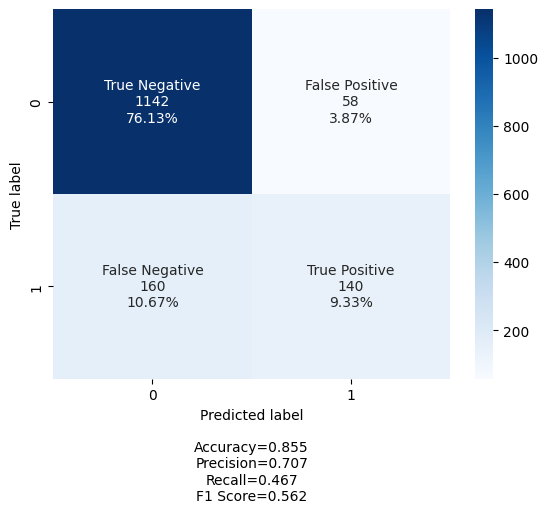

In [150]:
y_pred_test = model.predict(X_test)
for i in range(len(y_test)):
    if y_pred_test[i] > 0.5:
        y_pred_test[i] = 1
    else:
        y_pred_test[i] = 0

cm = confusion_matrix(y_test, y_pred_test)
labels = ['True Negative','False Positive','False Negative','True Positive']
make_confusion_matrix(cm, 
                      group_names=labels,
                      #categories=categories, 
                      cmap='Blues')

The recall score is .48 which is worse than 50/50 chance. False Negatives are 10% which is too high.

**Classification Report**

In [151]:
cr = classification_report(y_test, y_pred_test)
print(cr)

              precision    recall  f1-score   support

           0       0.88      0.95      0.91      1200
           1       0.71      0.47      0.56       300

    accuracy                           0.85      1500
   macro avg       0.79      0.71      0.74      1500
weighted avg       0.84      0.85      0.84      1500



Recall score is below 50% for predicted values.

### Neural Network with Adam Optimizer and Dropout

In [152]:
# Clear the current Keras session, resetting all layers and models previously created, freeing up memory and resources.
tf.keras.backend.clear_session()

#Initialize a neural network using the Sequential class
model = Sequential()
#Add the first hidden layer with neurons and relu activation function
model.add(Dense(firstHiddenLayerNeurons, activation=activationFunction, kernel_initializer=weightInitializer, input_shape=(trainingDataShape,)))
#add a dropout layer to prevent overfitting
model.add(Dropout(0.5))
#Add a second hidden layer with neurons and relu activation function
model.add(Dense(secondaryHiddenLayerNeurons, activation=activationFunction))
#add a dropout layer to prevent overfitting
model.add(Dropout(0.5))
#Add the output layer with 1 neuron and sigmoid activation function
model.add(Dense(1, activation='sigmoid'))

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 64)                768       
                                                                 
 dropout (Dropout)           (None, 64)                0         
                                                                 
 dense_1 (Dense)             (None, 32)                2080      
                                                                 
 dropout_1 (Dropout)         (None, 32)                0         
                                                                 
 dense_2 (Dense)             (None, 1)                 33        
                                                                 
Total params: 2881 (11.25 KB)
Trainable params: 2881 (11.25 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [153]:
#Compile the model with chosen optimizer and recall as the evaluation metric to minimize false negatives.
optimizer = tf.keras.optimizers.Adam(learning_rate=1e-4) #Adam optimizer
model.compile(loss='binary_crossentropy', optimizer=optimizer, metrics=[tf.keras.metrics.Recall()], run_eagerly=True)

In [154]:
#Fit the model on the training data and validate on the validation data
start = time.time()
history = model.fit(X_train, y_train, validation_data=(X_val,y_val), batch_size=batch_size, epochs=epochs)
end = time.time()

Epoch 1/50
  6/219 [..............................] - ETA: 2s - loss: 0.7276 - recall: 0.1000

219/219 [==============================] - 3s 12ms/step - loss: 0.6580 - recall: 0.1218 - val_loss: 0.4960 - val_recall: 0.0000e+00
Epoch 2/50
219/219 [==============================] - 3s 12ms/step - loss: 0.6158 - recall: 0.1432 - val_loss: 0.4818 - val_recall: 0.0000e+00
Epoch 3/50
219/219 [==============================] - 3s 12ms/step - loss: 0.5969 - recall: 0.1294 - val_loss: 0.4723 - val_recall: 0.0000e+00
Epoch 4/50
219/219 [==============================] - 3s 14ms/step - loss: 0.5637 - recall: 0.1342 - val_loss: 0.4674 - val_recall: 0.0000e+00
Epoch 5/50
219/219 [==============================] - 3s 12ms/step - loss: 0.5458 - recall: 0.1308 - val_loss: 0.4627 - val_recall: 0.0000e+00
Epoch 6/50
219/219 [==============================] - 3s 12ms/step - loss: 0.5432 - recall: 0.1321 - val_loss: 0.4609 - val_recall: 0.0106
Epoch 7/50
219/219 [==============================] - 3s 12ms/step - loss: 0.5399 - recall: 0.1328 - val_loss: 0.4583 - val_recall: 0.0106
Epoch 8/50
219/219

**Loss**

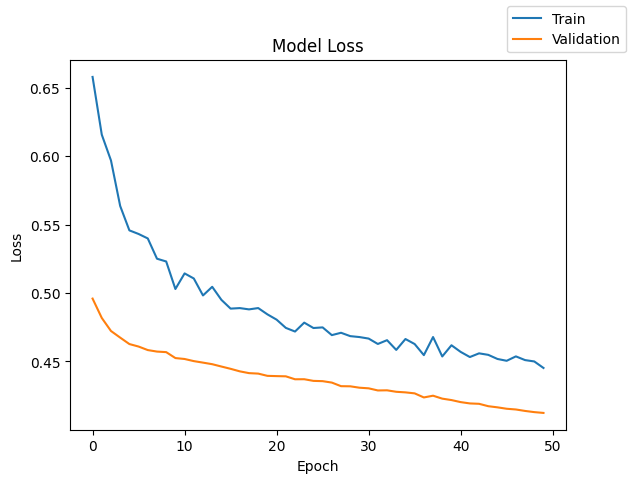

In [158]:
plot(history, 'loss')

The loss is actually less with the validation than training set which could indicate underfitting. They have not converged after 50 epochs.

**Confusion Matrix**

47/47 [==============================] - 0s 960us/step


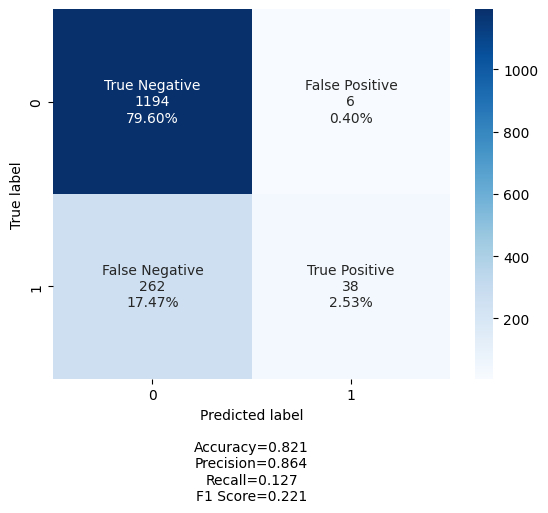

In [159]:
y_pred_test = model.predict(X_test)
for i in range(len(y_test)):
    if y_pred_test[i] > 0.5:
        y_pred_test[i] = 1
    else:
        y_pred_test[i] = 0

cm = confusion_matrix(y_test, y_pred_test)
labels = ['True Negative','False Positive','False Negative','True Positive']
make_confusion_matrix(cm, 
                      group_names=labels,
                      #categories=categories, 
                      cmap='Blues')

The recall score is .48 which is worse than 50/50 chance. False Negatives are 10% which is too high.

**Classification Report**

In [160]:
cr = classification_report(y_test, y_pred_test)
print(cr)

              precision    recall  f1-score   support

           0       0.82      0.99      0.90      1200
           1       0.86      0.13      0.22       300

    accuracy                           0.82      1500
   macro avg       0.84      0.56      0.56      1500
weighted avg       0.83      0.82      0.76      1500



Recall score is below 50% for predicted values.

### Neural Network with Balanced Data (by applying SMOTE) and SGD Optimizer

In [165]:
# Clear the current Keras session, resetting all layers and models previously created, freeing up memory and resources.
tf.keras.backend.clear_session()

#Initialize a neural network using the Sequential class
model = Sequential()
#Add the first hidden layer with neurons and relu activation function
model.add(Dense(firstHiddenLayerNeurons, activation=activationFunction, kernel_initializer=weightInitializer, input_shape=(trainingDataShape,)))
#Add a second hidden layer with neurons and relu activation function
model.add(Dense(secondaryHiddenLayerNeurons, activation=activationFunction))
#Add the output layer with 1 neuron and sigmoid activation function
model.add(Dense(1, activation='sigmoid'))

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 64)                768       
                                                                 
 dense_1 (Dense)             (None, 32)                2080      
                                                                 
 dense_2 (Dense)             (None, 1)                 33        
                                                                 
Total params: 2881 (11.25 KB)
Trainable params: 2881 (11.25 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [167]:
#Compile the model with chosen optimizer and recall as the evaluation metric to minimize false negatives.
optimizer = tf.keras.optimizers.SGD() #Stochastic Gradient Descent
model.compile(loss='binary_crossentropy', optimizer=optimizer, metrics=[tf.keras.metrics.Recall()], run_eagerly=True)

In [168]:
# Synthetic Minority Over Sampling Technique to balance the dataset
sm = SMOTE(sampling_strategy=1, k_neighbors=5, random_state=1)
X_train_over, y_train_over = sm.fit_resample(X_train, y_train)

In [169]:
## Show the shape of the y_train_over and the percentage of occurrences of each unique value after oversampling
print(y_train_over.shape)
print(y_train_over.value_counts(normalize=True))

(11094,)
1    0.5
0    0.5
Name: Exited, dtype: float64


In [170]:
#Fit the model on the oversampled training data and validate on the validation data
start = time.time()
history = model.fit(X_train_over, y_train_over, validation_data=(X_val,y_val), batch_size=batch_size, epochs=epochs)
end = time.time()

Epoch 1/50
 15/347 [>.............................] - ETA: 2s - loss: 0.7115 - recall_1: 0.5041

347/347 [==============================] - 3s 7ms/step - loss: 0.5920 - recall_1: 0.7047 - val_loss: 0.5562 - val_recall_1: 0.7007
Epoch 2/50
347/347 [==============================] - 2s 7ms/step - loss: 0.5200 - recall_1: 0.7487 - val_loss: 0.5239 - val_recall_1: 0.7148
Epoch 3/50
347/347 [==============================] - 3s 7ms/step - loss: 0.4912 - recall_1: 0.7678 - val_loss: 0.5235 - val_recall_1: 0.7465
Epoch 4/50
347/347 [==============================] - 2s 7ms/step - loss: 0.4737 - recall_1: 0.7842 - val_loss: 0.4768 - val_recall_1: 0.6831
Epoch 5/50
347/347 [==============================] - 2s 7ms/step - loss: 0.4614 - recall_1: 0.7894 - val_loss: 0.4856 - val_recall_1: 0.7254
Epoch 6/50
347/347 [==============================] - 2s 7ms/step - loss: 0.4520 - recall_1: 0.7956 - val_loss: 0.4654 - val_recall_1: 0.7007
Epoch 7/50
347/347 [==============================] - 2s 7ms/step - loss: 0.4456 - recall_1: 0.8004 - val_loss: 0.5062 - val_recall_1: 0.7676
Epoch 8/50
347/34

**Loss**

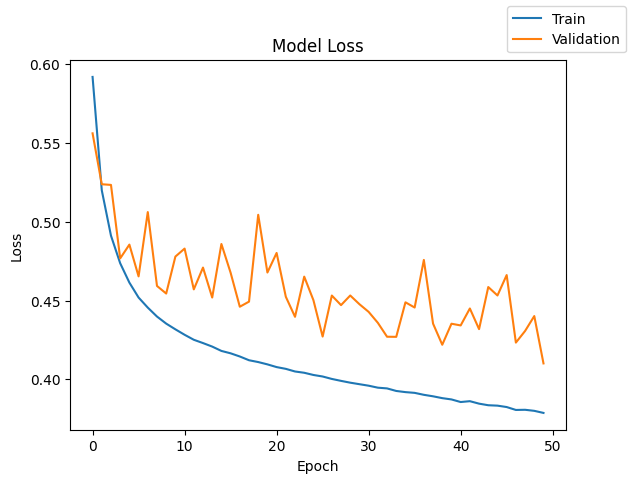

In [171]:
plot(history, 'loss')

The loss is actually less with the validation than training set which could indicate underfitting. They have not converged after 50 epochs.

**Confusion Matrix**

47/47 [==============================] - 0s 739us/step


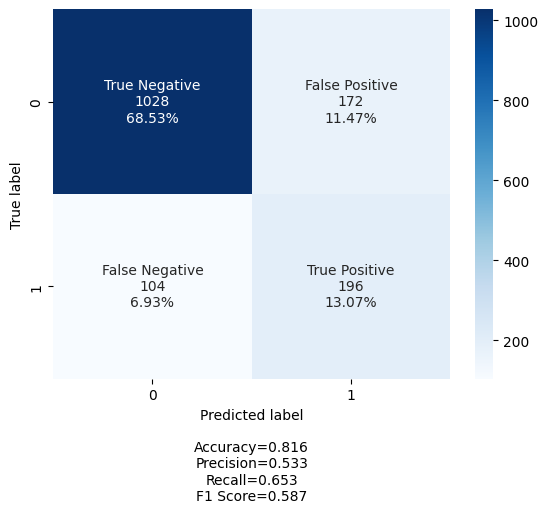

In [172]:
y_pred_test = model.predict(X_test)
for i in range(len(y_test)):
    if y_pred_test[i] > 0.5:
        y_pred_test[i] = 1
    else:
        y_pred_test[i] = 0

cm = confusion_matrix(y_test, y_pred_test)
labels = ['True Negative','False Positive','False Negative','True Positive']
make_confusion_matrix(cm, 
                      group_names=labels,
                      #categories=categories, 
                      cmap='Blues')

The recall score is .48 which is worse than 50/50 chance. False Negatives are 10% which is too high.

**Classification Report**

In [173]:
cr = classification_report(y_test, y_pred_test)
print(cr)

              precision    recall  f1-score   support

           0       0.91      0.86      0.88      1200
           1       0.53      0.65      0.59       300

    accuracy                           0.82      1500
   macro avg       0.72      0.76      0.73      1500
weighted avg       0.83      0.82      0.82      1500



Recall score is below 50% for predicted values.

### Neural Network with Balanced Data (by applying SMOTE) and Adam Optimizer

In [174]:
# Clear the current Keras session, resetting all layers and models previously created, freeing up memory and resources.
tf.keras.backend.clear_session()

#Initialize a neural network using the Sequential class
model = Sequential()
#Add the first hidden layer with neurons and relu activation function
model.add(Dense(firstHiddenLayerNeurons, activation=activationFunction, kernel_initializer=weightInitializer, input_shape=(trainingDataShape,)))
#Add a second hidden layer with neurons and relu activation function
model.add(Dense(secondaryHiddenLayerNeurons, activation=activationFunction))
#Add the output layer with 1 neuron and sigmoid activation function
model.add(Dense(1, activation='sigmoid'))

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 64)                768       
                                                                 
 dense_1 (Dense)             (None, 32)                2080      
                                                                 
 dense_2 (Dense)             (None, 1)                 33        
                                                                 
Total params: 2881 (11.25 KB)
Trainable params: 2881 (11.25 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [175]:
#Compile the model with chosen optimizer and recall as the evaluation metric to minimize false negatives.
optimizer = tf.keras.optimizers.Adam(learning_rate=1e-4) #Adam optimizer
model.compile(loss='binary_crossentropy', optimizer=optimizer, metrics=[tf.keras.metrics.Recall()], run_eagerly=True)

In [177]:
# Synthetic Minority Over Sampling Technique to balance the dataset
sm = SMOTE(sampling_strategy=1, k_neighbors=5, random_state=1)
X_train_over, y_train_over = sm.fit_resample(X_train, y_train)

In [178]:
## Show the shape of the y_train_over and the percentage of occurrences of each unique value after oversampling
print(y_train_over.shape)
print(y_train_over.value_counts(normalize=True))

(11094,)
1    0.5
0    0.5
Name: Exited, dtype: float64


In [179]:
#Fit the model on the oversampled training data and validate on the validation data
start = time.time()
history = model.fit(X_train_over, y_train_over, validation_data=(X_val,y_val), batch_size=batch_size, epochs=epochs)
end = time.time()

Epoch 1/50
 13/347 [>.............................] - ETA: 3s - loss: 0.6878 - recall: 0.4623

347/347 [==============================] - 3s 10ms/step - loss: 0.6145 - recall: 0.6171 - val_loss: 0.5520 - val_recall: 0.6479
Epoch 2/50
347/347 [==============================] - 3s 10ms/step - loss: 0.5392 - recall: 0.7391 - val_loss: 0.5282 - val_recall: 0.7077
Epoch 3/50
347/347 [==============================] - 3s 10ms/step - loss: 0.5065 - recall: 0.7646 - val_loss: 0.5075 - val_recall: 0.7218
Epoch 4/50
347/347 [==============================] - 3s 10ms/step - loss: 0.4872 - recall: 0.7797 - val_loss: 0.4875 - val_recall: 0.7113
Epoch 5/50
347/347 [==============================] - 3s 10ms/step - loss: 0.4739 - recall: 0.7817 - val_loss: 0.4809 - val_recall: 0.7218
Epoch 6/50
347/347 [==============================] - 3s 10ms/step - loss: 0.4639 - recall: 0.7862 - val_loss: 0.4819 - val_recall: 0.7289
Epoch 7/50
347/347 [==============================] - 3s 10ms/step - loss: 0.4561 - recall: 0.7887 - val_loss: 0.4765 - val_recall: 0.7324
Epoch 8/50
347/347 [==================

**Loss**

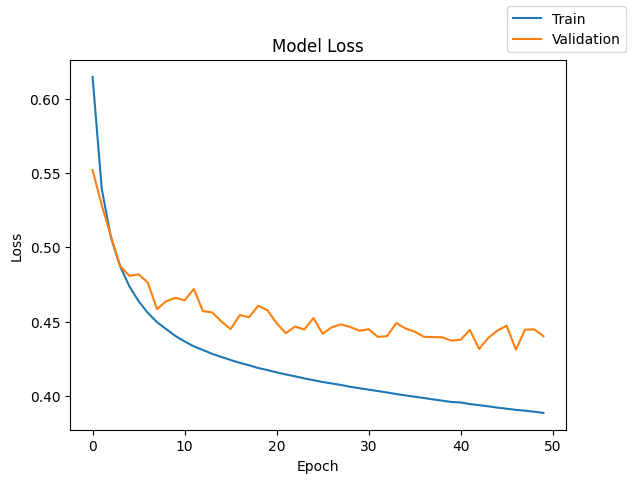

In [183]:
plot(history, 'loss')

The loss is actually less with the validation than training set which could indicate underfitting. They have not converged after 50 epochs.

**Confusion Matrix**

47/47 [==============================] - 0s 783us/step


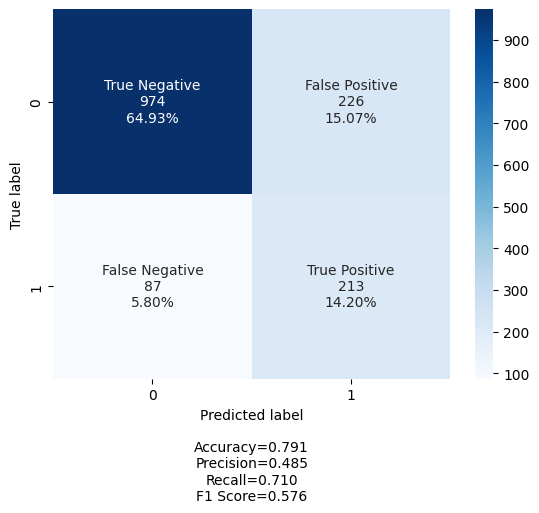

In [181]:
y_pred_test = model.predict(X_test)
for i in range(len(y_test)):
    if y_pred_test[i] > 0.5:
        y_pred_test[i] = 1
    else:
        y_pred_test[i] = 0

cm = confusion_matrix(y_test, y_pred_test)
labels = ['True Negative','False Positive','False Negative','True Positive']
make_confusion_matrix(cm, 
                      group_names=labels,
                      #categories=categories, 
                      cmap='Blues')

The recall score is .48 which is worse than 50/50 chance. False Negatives are 10% which is too high.

**Classification Report**

In [184]:
cr = classification_report(y_test, y_pred_test)
print(cr)

              precision    recall  f1-score   support

           0       0.92      0.81      0.86      1200
           1       0.49      0.71      0.58       300

    accuracy                           0.79      1500
   macro avg       0.70      0.76      0.72      1500
weighted avg       0.83      0.79      0.80      1500



Recall score is below 50% for predicted values.

### Neural Network with Balanced Data (by applying SMOTE), Adam Optimizer, and Dropout

In [185]:
# Clear the current Keras session, resetting all layers and models previously created, freeing up memory and resources.
tf.keras.backend.clear_session()

#Initialize a neural network using the Sequential class
model = Sequential()
#Add the first hidden layer with neurons and relu activation function
model.add(Dense(firstHiddenLayerNeurons, activation=activationFunction, kernel_initializer=weightInitializer, input_shape=(trainingDataShape,)))
#add a dropout layer to prevent overfitting
model.add(Dropout(0.5))
#Add a second hidden layer with neurons and relu activation function
model.add(Dense(secondaryHiddenLayerNeurons, activation=activationFunction))
#add a dropout layer to prevent overfitting
model.add(Dropout(0.5))
#Add the output layer with 1 neuron and sigmoid activation function
model.add(Dense(1, activation='sigmoid'))

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 64)                768       
                                                                 
 dropout (Dropout)           (None, 64)                0         
                                                                 
 dense_1 (Dense)             (None, 32)                2080      
                                                                 
 dropout_1 (Dropout)         (None, 32)                0         
                                                                 
 dense_2 (Dense)             (None, 1)                 33        
                                                                 
Total params: 2881 (11.25 KB)
Trainable params: 2881 (11.25 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [186]:
#Compile the model with chosen optimizer and recall as the evaluation metric to minimize false negatives.
optimizer = tf.keras.optimizers.Adam(learning_rate=1e-4) #Adam optimizer
model.compile(loss='binary_crossentropy', optimizer=optimizer, metrics=[tf.keras.metrics.Recall()], run_eagerly=True)

In [187]:
# Synthetic Minority Over Sampling Technique to balance the dataset
sm = SMOTE(sampling_strategy=1, k_neighbors=5, random_state=1)
X_train_over, y_train_over = sm.fit_resample(X_train, y_train)

In [188]:
## Show the shape of the y_train_over and the percentage of occurrences of each unique value after oversampling
print(y_train_over.shape)
print(y_train_over.value_counts(normalize=True))

(11094,)
1    0.5
0    0.5
Name: Exited, dtype: float64


In [189]:
#Fit the model on the oversampled training data and validate on the validation data
start = time.time()
history = model.fit(X_train_over, y_train_over, validation_data=(X_val,y_val), batch_size=batch_size, epochs=epochs)
end = time.time()

Epoch 1/50
 11/347 [..............................] - ETA: 3s - loss: 1.0213 - recall: 0.2376

347/347 [==============================] - 4s 12ms/step - loss: 0.8811 - recall: 0.3907 - val_loss: 0.7021 - val_recall: 0.6232
Epoch 2/50
347/347 [==============================] - 4s 12ms/step - loss: 0.7911 - recall: 0.4994 - val_loss: 0.6992 - val_recall: 0.7676
Epoch 3/50
347/347 [==============================] - 4s 12ms/step - loss: 0.7370 - recall: 0.5453 - val_loss: 0.6780 - val_recall: 0.7887
Epoch 4/50
347/347 [==============================] - 4s 12ms/step - loss: 0.6992 - recall: 0.5753 - val_loss: 0.6720 - val_recall: 0.8239
Epoch 5/50
347/347 [==============================] - 4s 12ms/step - loss: 0.6824 - recall: 0.6054 - val_loss: 0.6512 - val_recall: 0.8275
Epoch 6/50
347/347 [==============================] - 4s 12ms/step - loss: 0.6633 - recall: 0.6140 - val_loss: 0.6395 - val_recall: 0.8169
Epoch 7/50
347/347 [==============================] - 4s 12ms/step - loss: 0.6516 - recall: 0.6229 - val_loss: 0.6283 - val_recall: 0.8099
Epoch 8/50
347/347 [==================

**Loss**

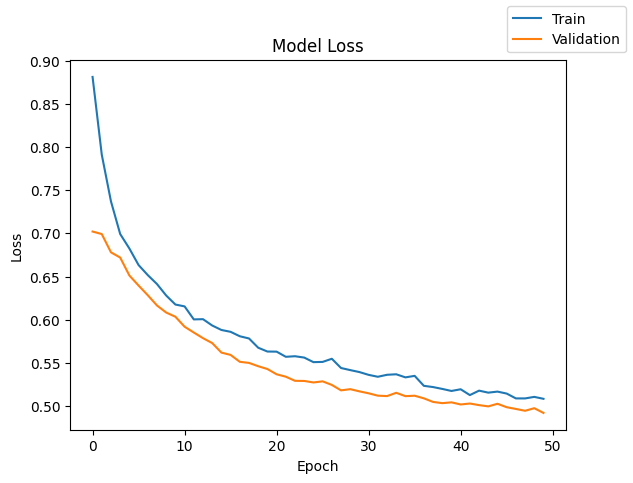

In [190]:
plot(history, 'loss')

The loss is actually less with the validation than training set which could indicate underfitting. They have not converged after 50 epochs.

**Confusion Matrix**

47/47 [==============================] - 0s 920us/step


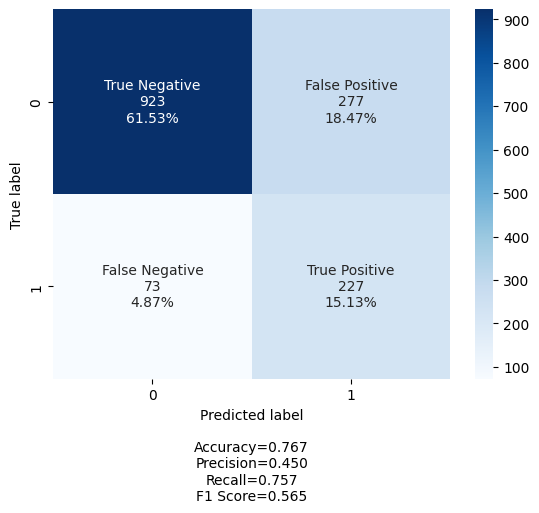

In [191]:
y_pred_test = model.predict(X_test)
for i in range(len(y_test)):
    if y_pred_test[i] > 0.5:
        y_pred_test[i] = 1
    else:
        y_pred_test[i] = 0

cm = confusion_matrix(y_test, y_pred_test)
labels = ['True Negative','False Positive','False Negative','True Positive']
make_confusion_matrix(cm, 
                      group_names=labels,
                      #categories=categories, 
                      cmap='Blues')

The recall score is .48 which is worse than 50/50 chance. False Negatives are 10% which is too high.

**Classification Report**

In [192]:
cr = classification_report(y_test, y_pred_test)
print(cr)

              precision    recall  f1-score   support

           0       0.93      0.77      0.84      1200
           1       0.45      0.76      0.56       300

    accuracy                           0.77      1500
   macro avg       0.69      0.76      0.70      1500
weighted avg       0.83      0.77      0.79      1500



Recall score is below 50% for predicted values.

## Model Performance Comparison and Final Model Selection

## Actionable Insights and Business Recommendations

*

